In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
data = pd.read_csv("Desktop/lol.csv")

In [3]:
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
data = data.drop(columns=['gameId','blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueTotalExperience',
       'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
       'blueGoldDiff', 'blueExperienceDiff','blueAvgLevel', 'blueCSPerMin', 'blueGoldPerMin']) #remove game ID

In [6]:
data = data.rename(columns={'blueWins':'target'})
data.head()

,target,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


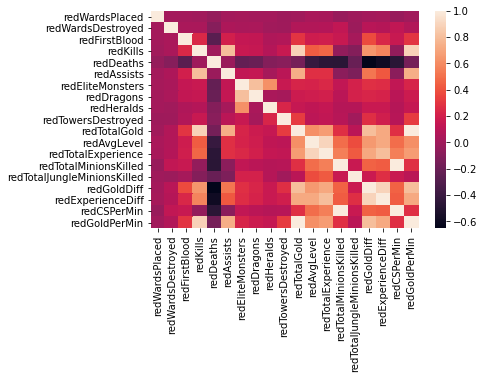

In [7]:
data2 = data.drop(columns=['target'])
pearsoncorr = data2.corr(method='pearson')
sb.heatmap(pearsoncorr)

In [8]:
data['target'].value_counts()
#1 = blue wins
#0 = red wins
#data set is pretty balanced in terms of win and loses for each team

0    4949
1    4930
Name: target, dtype: int64

In [9]:
print(data.dtypes)

target                           int64
redWardsPlaced                   int64
redWardsDestroyed                int64
redFirstBlood                    int64
redKills                         int64
redDeaths                        int64
redAssists                       int64
redEliteMonsters                 int64
redDragons                       int64
redHeralds                       int64
redTowersDestroyed               int64
redTotalGold                     int64
redAvgLevel                    float64
redTotalExperience               int64
redTotalMinionsKilled            int64
redTotalJungleMinionsKilled      int64
redGoldDiff                      int64
redExperienceDiff                int64
redCSPerMin                    float64
redGoldPerMin                  float64
dtype: object


In [10]:
dataTypeSeries = data.columns.to_series().groupby(data.dtypes).groups #set df.types as variable dataTypeSeries
 
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
{dtype('int64'): Index(['target', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood',
       'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons',
       'redHeralds', 'redTowersDestroyed', 'redTotalGold',
       'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff'],
      dtype='object'), dtype('float64'): Index(['redAvgLevel', 'redCSPerMin', 'redGoldPerMin'], dtype='object')}


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn import linear_model, decomposition, datasets
from sklearn.preprocessing import scale

In [12]:
#Pipleine for imputing, OHE, preprocessing
numeric_features = ['redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood',
       'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons',
       'redHeralds', 'redTowersDestroyed', 'redTotalGold',
       'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff','redAvgLevel', 'redCSPerMin', 'redGoldPerMin']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

#categorical_features = []

#categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    #('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])
        #('cat', categorical_transformer, categorical_features)])

In [13]:
from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [14]:
classifiers = [
    #LogisticRegression(),
    #DecisionTreeClassifier(),
    RandomForestClassifier(),
    #AdaBoostClassifier(),
    #XGBClassifier(),
    #SVC(kernel='linear', 
            #class_weight='balanced', # penalize
            #probability=True),
    #GaussianNB()
    #MLPClassifier(),
    #KNeighborsClassifier()
]

In [15]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators = 100))),
                        ('clf', None)])

In [16]:
# y are the values we want to predict
y = np.array(data['target'])
# Remove the labels from the features
# axis 1 refers to the columns
X = data.drop('target', axis = 1)
# Saving feature names for later use
X_list = list(X.columns)
X_list

['redWardsPlaced',
 'redWardsDestroyed',
 'redFirstBlood',
 'redKills',
 'redDeaths',
 'redAssists',
 'redEliteMonsters',
 'redDragons',
 'redHeralds',
 'redTowersDestroyed',
 'redTotalGold',
 'redAvgLevel',
 'redTotalExperience',
 'redTotalMinionsKilled',
 'redTotalJungleMinionsKilled',
 'redGoldDiff',
 'redExperienceDiff',
 'redCSPerMin',
 'redGoldPerMin']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [18]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (7903, 19)
Training Labels Shape: (7903,)
Testing Features Shape: (1976, 19)
Testing Labels Shape: (1976,)


In [19]:
def get_transformer_feature_names(columnTransformer):
  output_features = []

  for name, pipe, features in columnTransformer.transformers_:
    if name!='remainder':
      for i in pipe:
        trans_features = []
        if hasattr(i, 'categories_'):
          trans_features.extend(i.get_feature_names(features))
        else:
          trans_features = features
      output_features.extend(trans_features)

  return np.array(output_features)


In [20]:
roc_things = []
precision_recall_things = []

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
~Model Score: 0.707
~Feature Ranking:
1. redKills 3 (0.234)
2. redDeaths 4 (0.189)
3. redEliteMonsters 6 (0.135)
4. redWardsDestroyed 1 (0.132)
5. redWardsPlaced 0 (0.128)
6. redAssists 5 (0.099)
7. redFirstBlood 2 (0.083)
~Accuracy: 0.71 (+/- 0.02)
Confusion Matrix
[[0.71617497 0.28382503]
 [0.30110775 0.69889225]]


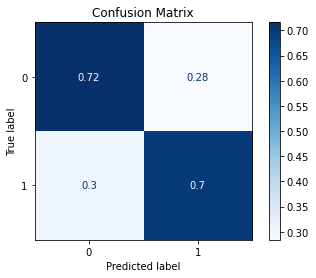

~Confusion Matrix:
 [[704 279]
 [299 694]]
~Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       983
           1       0.71      0.70      0.71       993

    accuracy                           0.71      1976
   macro avg       0.71      0.71      0.71      1976
weighted avg       0.71      0.71      0.71      1976

~Average Precision Score: 0.770
~roc_auc_score: 0.782
~precision-recall AUC: 0.773



In [21]:
for classifier in classifiers:
    clf.set_params(clf=classifier).fit(X_train, y_train)
    classifier_name = classifier.__class__.__name__
    print(str(classifier))
    print('~Model Score: %.3f' % clf.score(X_test, y_test))

    y_score = clf.predict_proba(X_test)[:,1]

    y_pred = clf.predict(X_test)
    
    roc_auc = roc_auc_score(y_test, y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_things.append((fpr, tpr, '{} AUC: {:.3f}'.format(classifier_name, roc_auc)))
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    pr_auc = auc(recall, precision)
    precision_recall_things.append((recall, precision, thresholds, '{} AUC: {:.3f}'.format(classifier_name, pr_auc)))
    #plot_precision_recall_curve(clf, X_test, y_test)
     
    feature_names = get_transformer_feature_names(clf.named_steps['preprocessor'])

    try:
      importances = classifier.feature_importances_
      indices = np.argsort(importances)[::-1]
      print('~Feature Ranking:')
    
      for f in range (X_test.shape[1]):
        print ('{}. {} {} ({:.3f})'.format(f + 1, feature_names[indices[f]], indices[f], importances[indices[f]]))
    except:
      pass
    
    scores = cross_val_score(clf, X, y, cv=5)
    print('~Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))
    
    titles_options = [("Confusion Matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    
    print('~Confusion Matrix:''\n',
    confusion_matrix(y_test, y_pred))
    print('~Classification Report:''\n',
    classification_report(y_test, y_pred))
   
    print('~Average Precision Score: {:.3f}'.format(average_precision_score(y_test, y_score)))
    print('~roc_auc_score: {:.3f}'.format(roc_auc))
    print('~precision-recall AUC: {:.3f}'.format(pr_auc))
    print()

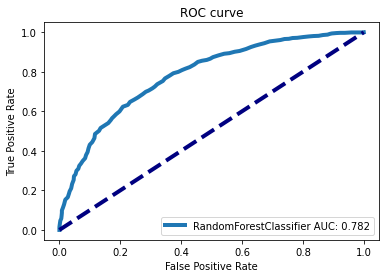

In [22]:
#ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
roc_plt = plt.figure()
lw = 4
for roc_thing in roc_things:
    fpr, tpr, label = roc_thing
    plt.plot(fpr, tpr, lw=lw, label=label)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

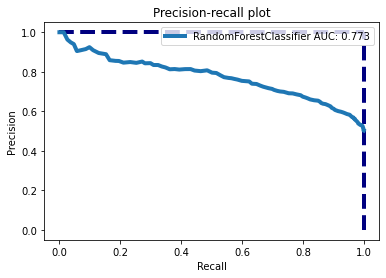

In [23]:
#Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a 
#predictive model using different probability thresholds.
pr_plt = plt.figure()
for pr_thing in precision_recall_things:
    recall, precision, _, label = pr_thing
    plt.plot(recall, precision, lw=lw, label=label)
ratio = y_test[y_test].shape[0] / y_test.shape[0]
plt.hlines(y=ratio, xmin=0, xmax=1, color='navy', lw=lw, linestyle='--')
plt.vlines(x=ratio, ymin=0, ymax=1, color='navy', lw=lw, linestyle='--')
plt.title('Precision-recall plot')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [24]:
from scipy.stats import hmean
import numpy.ma as ma

recall, precision, thresholds, _ = precision_recall_things[0]

a = np.column_stack((recall,precision))

a = ma.masked_less_equal(a, 0)
a = ma.mask_rows(a)
f1 = hmean(a,axis=1)

threshold_that_maximizes_f1 = thresholds[np.argmax(f1)]
print('threshold that optimizes f1: {}'.format(threshold_that_maximizes_f1))

threshold that optimizes f1: 0.37
